In [1]:
import pandas as pd
import numpy as np
from datetime import date
from datetime import time, datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline

In [14]:
#df= pd.read_csv("berlinerstraße1320.csv", low_memory=False, infer_datetime_format=True, usecols= ["Datum ", "NO2 (µg/m³)", "Temperatur (°C)", "Globalstrahlung (W/m²)","Windrichtung (°)", "Windgeschwindigkeit (m/s)" ])
df= pd.read_csv("berlinerstraße1520.csv", low_memory=False, infer_datetime_format=True, usecols= ["Datum ", "NO2 (µg/m³)", "Temperatur (°C)", "Globalstrahlung (W/m²)","Windrichtung (°)", "Windgeschwindigkeit (m/s)" ], na_values = ["NaN"])

In [15]:
df
#df.plot(x="Datum ", y="NO2 (µg/m³)", figsize=(15, 10))

,Datum,NO2 (µg/m³),Temperatur (°C),Globalstrahlung (W/m²),Windrichtung (°),Windgeschwindigkeit (m/s)
0,1/1/2015 0:30,38.5,2.0,1.0,151.0,0.4
1,1/1/2015 1:00,37.2,2.0,1.0,157.0,0.4
2,1/1/2015 1:30,37.0,1.9,1.0,152.0,0.9
3,1/1/2015 2:00,42.8,1.7,1.0,156.0,1.3
4,1/1/2015 2:30,38.0,1.8,1.0,142.0,0.8
...,...,...,...,...,...,...
105358,"Thu, 31/12/2020 22:00",19.5,2.9,8.0,153.0,1.2
105359,"Thu, 31/12/2020 22:30",18.9,3.1,8.0,150.0,1.1
105360,"Thu, 31/12/2020 23:00",22.1,3.1,8.0,159.0,0.9
105361,"Thu, 31/12/2020 23:30",22.4,3.2,8.0,151.0,0.8


In [21]:
my_date_range = pd.date_range('01-01-2015 00:00:00', periods = 105364, freq="30min", closed = "right")
#my_date_range = pd.date_range('01-01-2015 00:00:00', periods = 105364, freq="30min", closed = "right")
df = pd.DataFrame({'Time': my_date_range, 'NO2 (µg/m³)': df["NO2 (µg/m³)"], "Temperatur (°C)": df["Temperatur (°C)"], "Windgeschwindigkeit (m/s)": df["Windgeschwindigkeit (m/s)"], "Windrichtung (°)":df["Windrichtung (°)"]}) 

df["day"] = df["Time"].dt.date
df["month"]=df["Time"].dt.month
df["hour"] = df["Time"].dt.time
df['date'] = df['Time'].dt.strftime('%m-%d %H:%M-%S')

In [22]:
df
df_daily=df.resample('D', on='Time').mean()

In [23]:
df_daily

,NO2 (µg/m³),Temperatur (°C),Windgeschwindigkeit (m/s),Windrichtung (°),month
Time,,,,,
2015-01-01,35.593478,2.436170,0.904255,171.212766,1
2015-01-02,28.530435,2.010417,1.485417,155.937500,1
2015-01-03,33.106250,2.360417,1.108333,155.520833,1
2015-01-04,40.959574,2.989583,0.687500,224.479167,1
2015-01-05,39.983333,1.937500,0.785417,153.541667,1
...,...,...,...,...,...
2020-12-31,12.778261,5.033333,1.631250,150.104167,12
2021-01-01,13.702083,3.960417,1.622917,163.437500,1
2021-01-02,19.219149,4.666667,1.379167,166.270833,1


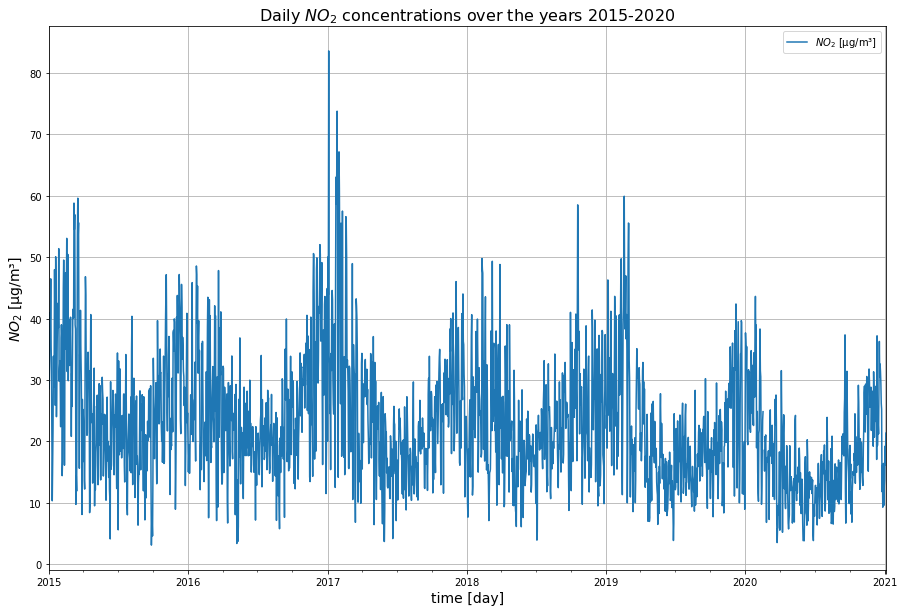

In [27]:
#fig,ax=plt.subplots()
ax=df_daily.plot(grid=True, y="NO2 (µg/m³)", figsize=(15, 10))
ax.set_xlabel('time [day]', fontsize=14)
ax.set_ylabel('$NO_{2}$ [µg/m³]', fontsize=14)
plt.title("Daily $NO_{2}$ concentrations over the years 2015-2020", fontsize=16)
plt.legend(["$NO_{2}$ [µg/m³]"])
plt.savefig("../../../plots/raino/no22015-20.png")

#df_winter.plot.scatter(grid=True, x="Windgeschwindigkeit_iup (m/s)", y="NO2 (µg/m³)", figsize=(12,8), alpha=0.3, c="Windrichtung_iup (°)", cmap="viridis", ax=ax)
#ax.set_xlabel('wind speed (m/s)', fontsize=14)
#ax.set_ylabel('$NO_{2}$ (µg/m³)', fontsize=14)
#plt.legend()
#plt.title("Wind speed IUP vs. $NO_{2}$ in winter", fontsize=16)
#plt.savefig("../../../plots/raino/windspeedIUPno2winter.png")